In [1]:
from src.handlers import process_and_clip_landsat_images
from src.handlers import process_bands_for_binary_image
from src.handlers import process_bands_for_true_color_image
from src.handlers import process_satellite_images_metadata
from src.settings import settings

from PIL import Image

import matplotlib.pyplot as plt
import os
import json

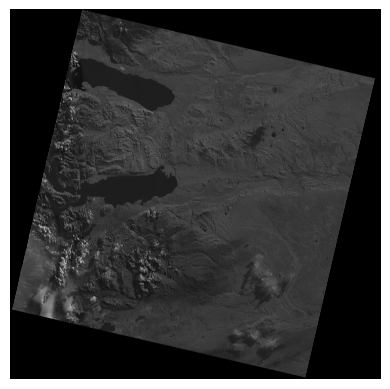

In [2]:
demo_landsat_image = "LC08_L2SP_230095_20130813_20200912_02_T1_SR_B6.TIF"
image_path_file = os.path.join(
    settings.IMAGES_DATASET.ORIGINAL_DATASET_PATH,
    demo_landsat_image,
)
image = Image.open(image_path_file)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [3]:
print(process_satellite_images_metadata.__doc__)
process_satellite_images_metadata()


    Processes Landsat satellite image files to extract and organize metadata into JSON and text report formats.

    This function scans a designated directory for satellite images, extracts metadata using filename decoding,
    and organizes this data by year. It then writes the organized data into two files: one in JSON format and another
    as a structured text report. If no images are found in the dataset, the function exits with an error message.

    Args:
        None

    Returns:
        None

    The function creates two files:
    - A JSON file containing structured metadata organized by year.
    - A text file providing a metadata report organized by year and month.
    


In [4]:
# metadata json file
json_path_file = os.path.join(
    settings.IMAGES_DATASET.DATASET_PATH,
    settings.IMAGES_DATASET.ORIGINAL_DATASET_METADATA_FILE,
)
with open(json_path_file) as file:
    landsat_images_data = json.load(file)

print(json.dumps(landsat_images_data, indent=4))

{
    "2013": {
        "satellites": [
            "LC08"
        ],
        "correction_level": [
            "L2SP"
        ],
        "collection_number": [
            "02"
        ],
        "collection_category": [
            "T1"
        ],
        "values": [
            {
                "satellite": "LC08",
                "wrs": "230095",
                "acquisition_date": "20130813",
                "processing_date": "20200912",
                "bands": [
                    "SR_B2",
                    "SR_B3",
                    "SR_B4",
                    "SR_B6"
                ]
            }
        ],
        "missing_months": [
            "01",
            "02",
            "03",
            "04",
            "05",
            "06",
            "07",
            "09",
            "10",
            "11",
            "12"
        ]
    }
}


In [5]:
# report txt file
txt_path_file = os.path.join(
    settings.IMAGES_DATASET.DATASET_PATH,
    settings.IMAGES_DATASET.ORIGINAL_DATASET_REPORT_FILE,
)
with open(txt_path_file) as file:
    landsat_images_report = file.read()

print(landsat_images_report)

Satellite Image Metadata Report

This report provides information about satellite image files in the specified directory.



**2013**
Missing Months: 01, 02, 03, 04, 05, 06, 07, 09, 10, 11, 12

08
(B2) - LC08_L2SP_230095_20130813_20200912_02_T1_SR_B2.TIF
(B3) - LC08_L2SP_230095_20130813_20200912_02_T1_SR_B3.TIF
(B4) - LC08_L2SP_230095_20130813_20200912_02_T1_SR_B4.TIF
(B6) - LC08_L2SP_230095_20130813_20200912_02_T1_SR_B6.TIF




In [6]:
print(process_and_clip_landsat_images.__doc__)
process_and_clip_landsat_images()


    Processes Landsat images data and clips images based on shapefile geometries.

    Loads metadata of Landsat images, generates paths for satellite images, and clips the
    first six images using specified shapefile geometries. The clipped images are saved
    in a designated output directory.
    


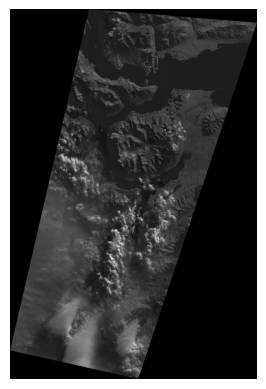

In [7]:
demo_clip_landsat_image = "20130813_230095_SR_B6_CROPPED.TIF"
image_clip_path_file = os.path.join(
    settings.IMAGES_DATASET.ROI_CROPPED_DATASET_PATH,
    demo_clip_landsat_image,
)
clip_image = Image.open(image_clip_path_file)
plt.imshow(clip_image, cmap="gray")
plt.axis("off")
plt.show()

In [8]:
print(process_bands_for_true_color_image.__doc__)
process_bands_for_true_color_image()


    Processes Landsat band images to create true color images.

    This function reads Landsat band images from a specified directory, filters them based on the file extension,
    and then uses these images to create true color images. The resulting true color images are saved
    in a designated output directory.
    


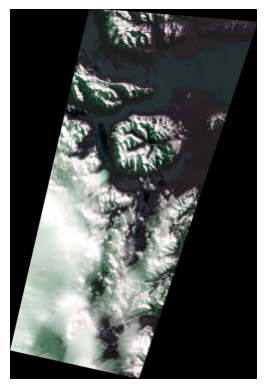

In [9]:
demo_color_landsat_image = "20130813_230095_COLOR.png"
image_color_path_file = os.path.join(
    settings.IMAGES_DATASET.ROI_CROPPED_COLOR_DATASET_PATH,
    demo_color_landsat_image,
)
color_image = Image.open(image_color_path_file)
plt.imshow(color_image, cmap="gray")
plt.axis("off")
plt.show()

In [10]:
print(process_bands_for_binary_image.__doc__)
process_bands_for_binary_image()


    Processes Landsat band images to create binary images.

    This function reads Landsat band images from a specified directory, filters them based on the file extension,
    and then uses these images to create binary images. The binary images are generated based on the Normalized
    Difference Snow Index (NDSI) using specific bands. The resulting binary images are saved in a designated
    output directory.
    


/home/crubio_lnx/Documents/pale-blue-dot-challenge/src/image_processor.py:190: RuntimeWarning: invalid value encountered in divide
  ndsi = (band_b3_data - band_b6_data) / (band_b3_data + band_b6_data)


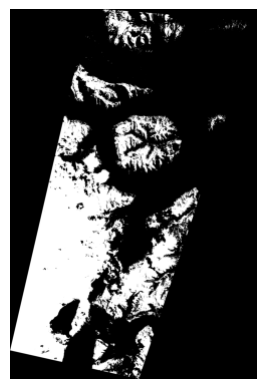

In [11]:
demo_binary_landsat_image = "20130813_230095_BINARY.png"
image_binary_path_file = os.path.join(
    settings.IMAGES_DATASET.ROI_CROPPED_BINARY_DATASET_PATH,
    demo_binary_landsat_image,
)
binary_image = Image.open(image_binary_path_file)
plt.imshow(binary_image, cmap="gray")
plt.axis("off")
plt.show()